In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/cta?purveyor=owner#search=1~gallery~0~0'
raw = requests.get(url,headers=header) # Get page

from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [4]:
import re # Regular expressions

brands = ['honda', 'dodge','toyota','ford','tesla','gmc','jeep','bmw','mitsubishi','mazda',
          'volvo','audi','volkswagen','chevy','chevrolet','acura','kia','subaru','lexus',
          'cadillac','buick','porsche','infiniti']

data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})

In [5]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_cville_cars.csv') # Save data in case of a disaster
df.head()

(93, 6)


,title,price,year,link,brand,age
0,2005 toyota tundra sr5 crew cab,7000,2005.0,https://charlottesville.craigslist.org/cto/d/c...,toyota,20.0
1,1992 toyota pickup,4600,1992.0,https://charlottesville.craigslist.org/cto/d/b...,toyota,33.0
2,2014 gmc sierra 1500,15000,2014.0,https://charlottesville.craigslist.org/cto/d/c...,gmc,11.0
3,2000 chevy silverado 1500 ls,8000,2000.0,https://charlottesville.craigslist.org/cto/d/d...,chevy,25.0
4,2004 chevy blazer,4000,2004.0,https://charlottesville.craigslist.org/cto/d/s...,chevy,21.0


count       93.000000
mean      7845.408602
std       7802.026957
min         10.000000
25%       3200.000000
50%       5000.000000
75%       9950.000000
max      49900.000000
Name: price, dtype: float64


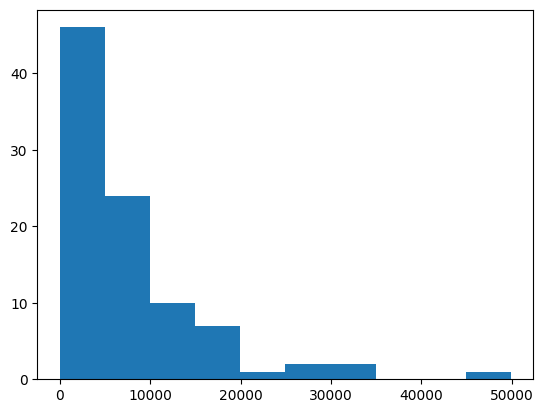

count    77.000000
mean     19.051948
std      10.166892
min       4.000000
25%      13.000000
50%      18.000000
75%      21.000000
max      63.000000
Name: age, dtype: float64


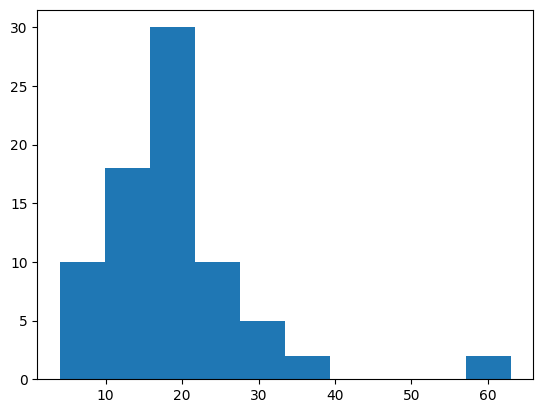

In [6]:
# EDA for price and age:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [7]:
# Price by brand:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                          \
           count          mean           std      min       25%      50%   
brand                                                                      
acura        1.0   3500.000000           NaN   3500.0   3500.00   3500.0   
audi         2.0   6432.500000   7399.872465   1200.0   3816.25   6432.5   
bmw          4.0   5850.000000   2248.703330   3000.0   5175.00   5950.0   
buick        3.0   3700.000000    984.885780   2600.0   3300.00   4000.0   
chevrolet    3.0  10000.000000   6500.000000   6000.0   6250.00   6500.0   
chevy        6.0   4001.666667   2526.661170     10.0   4000.00   4000.0   
dodge        4.0   6250.000000   3304.037934   2000.0   5000.00   6500.0   
ford         7.0   6278.571429   4321.829970   1000.0   2500.00   7250.0   
gmc          4.0   8450.000000   4892.511284   3500.0   5675.00   7650.0   
honda       10.0   7164.900000   3914.201790   1000.0   4775.00   7200.0   
jeep         4.0   8725.000000   7818.940678   1500.0   2625.00   7750.0   
kia          2.0   6500.000000   4242.640687   3500.0   5000.00   6500.0   
lexus        1.0  14950.000000           NaN  14950.0  14950.00  14950.0   
missing     22.0   8872.681818   8620.110437   1200.0   3000.00   4875.0   
mitsubishi   1.0   3200.000000           NaN   3200.0   3200.00   3200.0   
subaru       4.0   4675.000000   2396.351393   2000.0   3125.00   4650.0   
tesla        2.0  21450.000000   6434.671709  16900.0  19175.00  21450.0   
toyota      10.0  11845.000000  15855.711379   1500.0   3350.00   4350.0   
volkswagen   1.0   4950.000000           NaN   4950.0   4950.00   4950.0   
volvo        2.0   2050.000000     70.710678   2000.0   2025.00   2050.0   

                               
                 75%      max  
brand                          
acura        3500.00   3500.0  
audi         9048.75  11665.0  
bmw          6625.00   8500.0  
buick        4250.00   4500.0  
chevrolet   12000.00  17500.0  
chevy        4000.00   8000.0  
dodge        7750.00  10000.0  
ford         9600.00  11500.0  
gmc         10425.00  15000.0  
honda        9637.50  13000.0  
jeep        13850.00  17900.0  
kia          8000.00   9500.0  
lexus       14950.00  14950.0  
missing     14462.50  31950.0  
mitsubishi   3200.00   3200.0  
subaru       6200.00   7400.0  
tesla       23725.00  26000.0  
toyota      10000.00  49900.0  
volkswagen   4950.00   4950.0  
volvo        2075.00   2100.0

In [8]:
# Age by brand:
df.loc[:,['age','brand']].groupby('brand').describe()

age                                                      
           count       mean        std   min    25%   50%    75%   max
brand                                                                 
acura        1.0  17.000000        NaN  17.0  17.00  17.0  17.00  17.0
audi         1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0
bmw          2.0  12.500000   2.121320  11.0  11.75  12.5  13.25  14.0
buick        1.0  19.000000        NaN  19.0  19.00  19.0  19.00  19.0
chevrolet    3.0  27.333333   9.609024  17.0  23.00  29.0  32.50  36.0
chevy        5.0  24.200000   4.147288  21.0  21.00  23.0  25.00  31.0
dodge        1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0
ford         6.0  21.833333   9.152413  13.0  17.25  19.0  23.00  39.0
gmc          4.0  17.750000   8.539126  10.0  10.75  17.0  24.00  27.0
honda       10.0  17.000000   7.180220  10.0  11.25  15.5  20.50  33.0
jeep         3.0  37.333333  22.368132  22.0  24.50  27.0  45.00  63.0
kia          2.0  12.500000   4.949747   9.0  10.75  12.5  14.25  16.0
lexus        1.0  15.000000        NaN  15.0  15.00  15.0  15.00  15.0
missing     18.0  17.666667  12.024485   6.0  14.00  16.5  19.00  62.0
mitsubishi   1.0  19.000000        NaN  19.0  19.00  19.0  19.00  19.0
subaru       4.0  16.250000   2.217356  13.0  16.00  17.0  17.25  18.0
tesla        2.0   8.000000   1.414214   7.0   7.50   8.0   8.50   9.0
toyota       9.0  16.666667   9.899495   4.0   7.00  18.0  22.00  33.0
volkswagen   1.0  15.000000        NaN  15.0  15.00  15.0  15.00  15.0
volvo        2.0  27.000000   8.485281  21.0  24.00  27.0  30.00  33.0

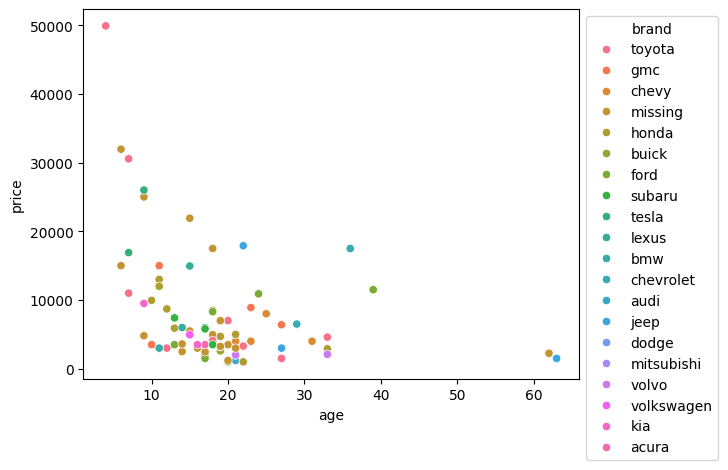

In [9]:
ax = sns.scatterplot(data=df, x='age', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

           log_price   log_age
log_price   1.106926 -0.228178
log_age    -0.228178  0.244782
           log_price   log_age
log_price   1.000000 -0.529127
log_age    -0.529127  1.000000


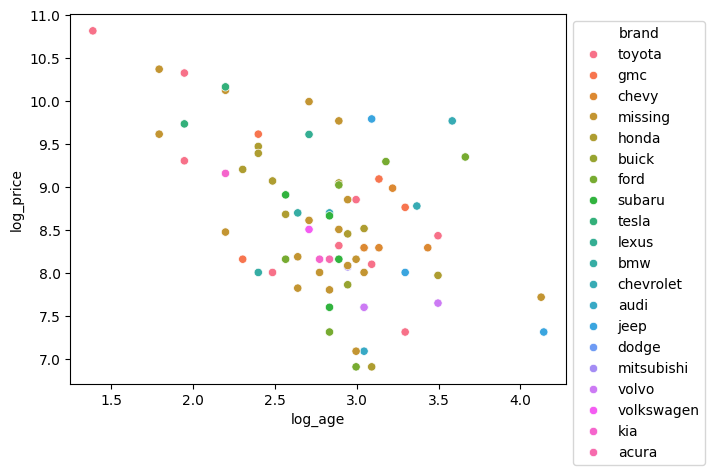

In [10]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_age']].cov())
print(df.loc[:,['log_price','log_age']].corr())

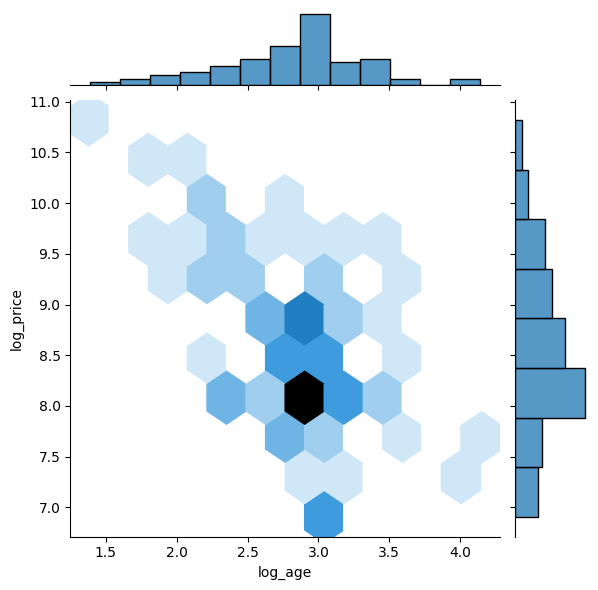

In [11]:
sns.jointplot(data=df, x='log_age', y='log_price',kind='hex')
